<a href="https://colab.research.google.com/github/Guadito/dmeyf2025/blob/main/cazatalentos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

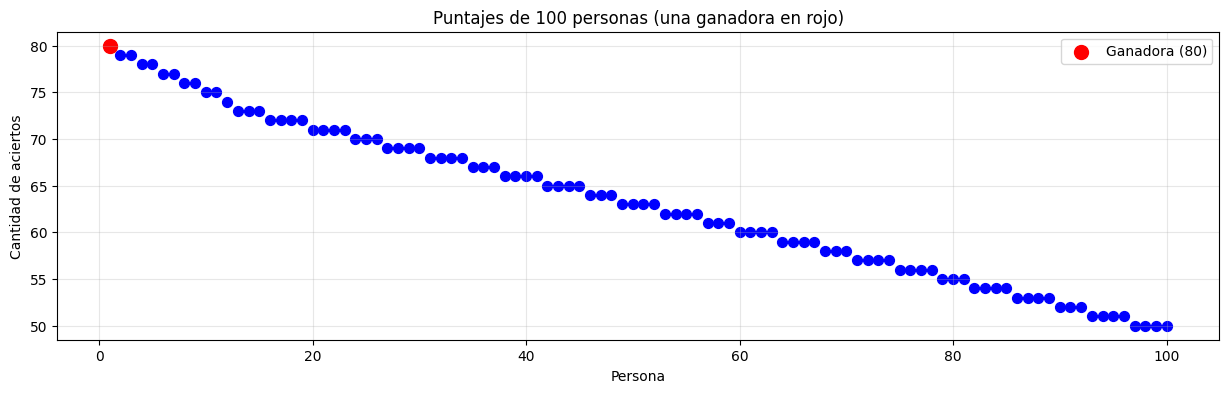

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Número total de personas
N = 100

# Creamos el vector de puntajes
scores = np.zeros(N, dtype=int)
scores[0] = 80
scores[1:3] = 79
scores[3:5] = 78
scores[5:7] = 77
scores[7:9] = 76
scores[9:11] = 75
scores[11:] = np.linspace(74, 50, N-11, dtype=int)

# Graficamos
plt.figure(figsize=(15,4))
plt.scatter(range(1, N+1), scores, color='blue', s=50)
plt.scatter(1, 80, color='red', s=100, label="Ganadora (80)")
plt.title("Puntajes de 100 personas (una ganadora en rojo)")
plt.xlabel("Persona")
plt.ylabel("Cantidad de aciertos")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


In [ ]:
#C1: en promedio, el grupo tiene 0.54 de acertar
#Z cuántas desviaciones estándar por encima del promedio del grupo está la ganadora.
#En un test normal, Z > 1.96 ya indica significancia al 5%, así que 5.073 es altamente significativo.


import numpy as np
from scipy.stats import norm

# Número total de personas
N = 100

# Vector vacío
scores = np.zeros(N, dtype=int)

# 1️⃣ Ganadora
scores[0] = 80

# 2️⃣ Bloques de 5 descendiendo hasta 30
idx = 1
puntaje = 79
while idx + 2 <= N and puntaje >= 30:
    scores[idx:idx+2] = puntaje
    idx += 2
    puntaje -= 1

# Si quedan posiciones sin llenar (por si N no es múltiplo de 5), rellenamos con el último puntaje válido
if idx < N:
    scores[idx:] = max(puntaje, 30)

# Revisamos
print(scores)
print("Cantidad de personas:", len(scores))

# 3️⃣ Percentil de la ganadora
rank = np.sum(scores < 80)
percentil = rank / N * 100
print("Percentil de la ganadora:", percentil)

# 4️⃣ Z-test comparando la ganadora con el resto
group_rest = scores[1:]
p_group = np.mean(group_rest)/100
p_ganadora = 80/100
n = 100

se = np.sqrt(p_group * (1 - p_group) / n)
z = (p_ganadora - p_group)/se
p_value = 1 - norm.cdf(z)

print("Proporción promedio del resto del grupo:", round(p_group,3))
print("Z =", round(z,3))
print("p-value =", round(p_value,5))



[80 79 79 78 78 77 77 76 76 75 75 74 74 73 73 72 72 71 71 70 70 69 69 68
 68 67 67 66 66 65 65 64 64 63 63 62 62 61 61 60 60 59 59 58 58 57 57 56
 56 55 55 54 54 53 53 52 52 51 51 50 50 49 49 48 48 47 47 46 46 45 45 44
 44 43 43 42 42 41 41 40 40 39 39 38 38 37 37 36 36 35 35 34 34 33 33 32
 32 31 31 30]
Cantidad de personas: 100
Percentil de la ganadora: 99.0
Proporción promedio del resto del grupo: 0.547
Z = 5.073
p-value = 0.0


In [ ]:
 C1 < C2

In [ ]:
#C2: el promedio de aciertos del grupo es muy bajo. 0.217
#Z cuántas desviaciones estándar por encima del promedio del grupo está la ganadora.


import numpy as np
from scipy.stats import norm

# Número total de personas
N = 200
scores = np.zeros(N, dtype=int)

# 1️⃣ Ganadora
scores[0] = 80

# 2️⃣ Bloques iniciales irregulares
idx = 1
bloques = [(6, 79), (5, 78), (4, 77), (3, 76), (2, 75)]

for cant, puntaje in bloques:
    scores[idx:idx+cant] = puntaje
    idx += cant

# 3️⃣ A partir de ahí, bloques de 1 descendiendo hasta completar N personas
puntaje = 74
while idx < N:
    scores[idx] = puntaje
    idx += 1
    puntaje -= 1
    if puntaje < 0:
        puntaje = 0  # aseguramos que no bajen de 0

# 4️⃣ Revisamos
print(scores)
print("Cantidad de personas:", len(scores))

# 5️⃣ Percentil de la ganadora
rank = np.sum(scores < 80)
percentil = rank / N * 100
print("Percentil de la ganadora:", percentil)

# 6️⃣ Z-test comparando la ganadora con el resto
group_rest = scores[1:]
p_group = np.mean(group_rest)/100
p_ganadora = 80/100
n = 100

se = np.sqrt(p_group * (1 - p_group) / n)
z = (p_ganadora - p_group)/se
p_value = 1 - norm.cdf(z)

print("Proporción promedio del resto del grupo:", round(p_group,3))
print("Z =", round(z,3))
print("p-value =", round(p_value,5))



[80 79 79 79 79 79 79 78 78 78 78 78 77 77 77 77 76 76 76 75 75 74 73 72
 71 70 69 68 67 66 65 64 63 62 61 60 59 58 57 56 55 54 53 52 51 50 49 48
 47 46 45 44 43 42 41 40 39 38 37 36 35 34 33 32 31 30 29 28 27 26 25 24
 23 22 21 20 19 18 17 16 15 14 13 12 11 10  9  8  7  6  5  4  3  2  1  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0]
Cantidad de personas: 200
Percentil de la ganadora: 99.5
Proporción promedio del resto del grupo: 0.217
Z = 14.127
p-value = 0.0


In [ ]:
#C4

import numpy as np
from scipy.stats import norm

# Número de tiros
n_tiros = 100

# Probabilidades de acierto
p_elegido = 0.8   # el que sacó 80 aciertos
p_otro = 0.75     # el otro

# Simulamos un solo tiro de 100 para cada uno (observado)
aciertos_elegido = 80
aciertos_otro = 75

# Creamos el vector del grupo
scores = np.array([aciertos_elegido, aciertos_otro])

# Percentil del elegido
rank = np.sum(scores < aciertos_elegido)
percentil = rank / len(scores) * 100
print("Percentil del elegido:", percentil)

# Z-test comparando la elección con el resto del grupo
group_rest = scores[1:]
p_group = np.mean(group_rest) / n_tiros
p_ganador = aciertos_elegido / n_tiros

# Error estándar
se = np.sqrt(p_group * (1 - p_group) / n_tiros)
z = (p_ganador - p_group) / se

# p-value unilateral
p_value = 1 - norm.cdf(z)

print("Proporción promedio del resto del grupo:", round(p_group,3))
print("Z =", round(z,3))
print("p-value =", round(p_value,5))


Percentil del elegido: 50.0
Proporción promedio del resto del grupo: 0.75
Z = 1.155
p-value = 0.12411


In [ ]:
Supongamos dos grupos distintos:

	N	Promedio resto	Ganadora
1	100	0.547	0.80
2	200	0.217	0.80
3 100 ?     0.80
4 2   0.75  0.80
5 1   0     0.70
6 100 ?     0.79